Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Dividing Data...
(0, Variable containing:
 0.3059
[torch.FloatTensor of size 1]
)
(90.78, 91.64, 91.25)
(5, Variable containing:
 0.1882
[torch.FloatTensor of size 1]
)
(93.03818181818181, 93.96, 93.04)
(10, Variable containing:
 0.1309
[torch.FloatTensor of size 1]
)
(93.75454545454545, 94.4, 93.77)
(15, Variable containing:
1.00000e-02 *
  9.2893
[torch.FloatTensor of size 1]
)
(94.42545454545454, 95.14, 94.14)
(20, Variable containing:
1.00000e-02 *
  5.7097
[torch.FloatTensor of size 1]
)
(95.46545454545455, 95.64, 95.01)
(25, Variable containing:
1.00000e-02 *
  4.3357
[torch.FloatTensor of size 1]
)
(96.22363636363636, 96.26, 95.9)
(Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...  

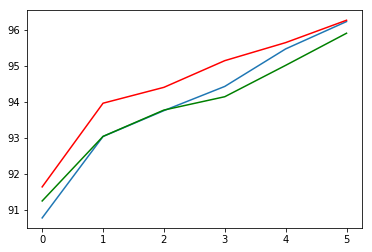

In [153]:
import torch
from torch.autograd import Variable
import numpy as np
import pickle
import torch.nn as nn
import torch.optim as optim

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

train = mnist.train.images
train_labels = mnist.train.labels

valid = mnist.validation.images
valid_labels = mnist.validation.labels

test = mnist.test.images
test_labels = mnist.test.labels

def unOneHot(labels):
        classes = []
        for label in labels:
            classes.append(np.argmax(label))
        classes = np.array(classes)
        return np.array(classes).astype(float)


def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/predictions.shape[0])

print('Dividing Data...')

N, D_in, H1, H2, H3, D_out = None, mnist.train.images.shape[1], 800, 600, 20, 10

train_x = Variable(torch.Tensor(train))
train_y = Variable(torch.Tensor(train_labels))

valid_x = Variable(torch.Tensor(valid))
valid_y = Variable(torch.Tensor(valid_labels))

test_x = Variable(torch.Tensor(test))
test_y = Variable(torch.Tensor(test_labels))

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.Tanh(),
    torch.nn.Linear(H1, H2),
    torch.nn.Tanh(),
    torch.nn.Linear(H2, D_out),
    torch.nn.LogSoftmax(),
)

multiLabelLoss = torch.nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), weight_decay = 0.001)


learning_rate = 0.01
batch_size = 128
total_training_samples = 14281
"""x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])
print(x.shape, y.shape)"""
results = []
for t in range(30):
    i = 0
    while i < total_training_samples:
        batch = train[i : i + batch_size]
        batch_labels = train_labels[i : i + batch_size]
        batch_labels = unOneHot(batch_labels)
        x = Variable(torch.Tensor(batch))
        y = Variable(torch.Tensor(batch_labels), requires_grad = False).type(torch.LongTensor)
        i += batch_size
        y_pred = model(x)
      
        loss = multiLabelLoss(y_pred, y)
        #print(loss, end = '\r')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if not t%5:
        print(t, loss)
        
        train_pred = model(train_x)
        
        
        tracc = accuracy(train_pred.data.numpy(), train_labels)
        valid_pred = model(valid_x)
        vacc = accuracy(valid_pred.data.numpy(), valid_labels)
        #print(valid_pred.data.numpy())
        #raise ValueError
        test_pred = model(test_x)
        tacc = accuracy(test_pred.data.numpy(), test_labels)
        print(tracc, vacc, tacc)
        results.append((tracc, vacc, tacc))
y_pred = model(x)
print(x, y_pred)
results = np.array(results)
import matplotlib.pyplot as plt
#pickle.dump(results, open("TorchSwitchingAct.pickle", "wb"))
plt.plot(results[:, 0])
plt.plot(results[:, 1], 'r')
plt.plot(results[:, 2], 'g')
plt.show()


In [155]:
import numpy as np

def reformat(labels, num_labels):
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return np.array(labels).astype(float)


def datadownload():
    from sklearn import datasets
    iris = datasets.load_iris()
    data = iris.data
    
    labels = iris.target
    #labels = reformat(labels,3)
    
    train, train_labels = data[:int(data.shape[0]*0.7)], labels[:int(data.shape[0]*0.7)]
    valid, valid_labels = data[int(data.shape[0]*0.7):int(data.shape[0]*0.85)], labels[int(data.shape[0]*0.7):int(data.shape[0]*0.85)]
    test, test_labels = data[int(data.shape[0]*0.85):], labels[int(data.shape[0]*0.85):]
    return np.array(train), np.array(train_labels), np.array(valid), np.array(valid_labels), np.array(test), np.array(test_labels)

train,train_labels,valid,valid_labels,test,test_labels = datadownload()


In [156]:
import torch
from torch.autograd import Variable
import numpy as np
import pickle
import torch.nn as nn
import torch.optim as optim

In [157]:
N, D_in, H1, H2, H3, D_out = None, 4, 10, 20, 10, 3

print train.shape

(105, 4)


In [158]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.Tanh(),
    torch.nn.Linear(H1, H2),
    torch.nn.Tanh(),
    torch.nn.Linear(H2, D_out),
    torch.nn.LogSoftmax(),
)

multiLabelLoss = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), weight_decay = 0.001)


In [159]:
learning_rate = 0.01
batch_size = 50
total_training_samples = 150

In [160]:
train_x = Variable(torch.Tensor(train))
train_y = Variable(torch.Tensor(train_labels))

valid_x = Variable(torch.Tensor(valid))
valid_y = Variable(torch.Tensor(valid_labels))

test_x = Variable(torch.Tensor(test))
test_y = Variable(torch.Tensor(test_labels))


(0, Variable containing:
 0.2311
[torch.FloatTensor of size 1]
)
(98.0952380952381, 90.9090909090909, 82.6086956521739)
(5, Variable containing:
 0.2216
[torch.FloatTensor of size 1]
)
(98.0952380952381, 86.36363636363636, 82.6086956521739)
(10, Variable containing:
 0.2125
[torch.FloatTensor of size 1]
)
(98.0952380952381, 86.36363636363636, 82.6086956521739)
(15, Variable containing:
 0.2039
[torch.FloatTensor of size 1]
)
(98.0952380952381, 86.36363636363636, 82.6086956521739)
(20, Variable containing:
 0.1957
[torch.FloatTensor of size 1]
)
(98.0952380952381, 86.36363636363636, 82.6086956521739)
(25, Variable containing:
 0.1880
[torch.FloatTensor of size 1]
)
(98.0952380952381, 86.36363636363636, 82.6086956521739)
(30, Variable containing:
 0.1806
[torch.FloatTensor of size 1]
)
(98.0952380952381, 86.36363636363636, 82.6086956521739)
(35, Variable containing:
 0.1736
[torch.FloatTensor of size 1]
)
(98.0952380952381, 86.36363636363636, 82.6086956521739)
(40, Variable containing:
 

(335, Variable containing:
1.00000e-02 *
  4.2028
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 69.56521739130434)
(340, Variable containing:
1.00000e-02 *
  4.1477
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 69.56521739130434)
(345, Variable containing:
1.00000e-02 *
  4.0942
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 69.56521739130434)
(350, Variable containing:
1.00000e-02 *
  4.0421
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 69.56521739130434)
(355, Variable containing:
1.00000e-02 *
  3.9915
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 69.56521739130434)
(360, Variable containing:
1.00000e-02 *
  3.9422
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 69.56521739130434)
(365, Variable containing:
1.00000e-02 *
  3.8943
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 69.56521739130434)
(370, Variable conta

(660, Variable containing:
1.00000e-02 *
  2.3537
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(665, Variable containing:
1.00000e-02 *
  2.3394
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(670, Variable containing:
1.00000e-02 *
  2.3253
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(675, Variable containing:
1.00000e-02 *
  2.3115
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(680, Variable containing:
1.00000e-02 *
  2.2978
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(685, Variable containing:
1.00000e-02 *
  2.2843
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(690, Variable containing:
1.00000e-02 *
  2.2709
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(695, Variabl

(1010, Variable containing:
1.00000e-02 *
  1.6623
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1015, Variable containing:
1.00000e-02 *
  1.6552
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1020, Variable containing:
1.00000e-02 *
  1.6480
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1025, Variable containing:
1.00000e-02 *
  1.6409
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1030, Variable containing:
1.00000e-02 *
  1.6339
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1035, Variable containing:
1.00000e-02 *
  1.6269
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1040, Variable containing:
1.00000e-02 *
  1.6199
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1045,

(1345, Variable containing:
1.00000e-02 *
  1.2544
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1350, Variable containing:
1.00000e-02 *
  1.2492
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1355, Variable containing:
1.00000e-02 *
  1.2441
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1360, Variable containing:
1.00000e-02 *
  1.2390
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1365, Variable containing:
1.00000e-02 *
  1.2339
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1370, Variable containing:
1.00000e-02 *
  1.2288
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1375, Variable containing:
1.00000e-02 *
  1.2238
[torch.FloatTensor of size 1]
)
(99.04761904761905, 86.36363636363636, 60.869565217391305)
(1380,

(1670, Variable containing:
1.00000e-03 *
  9.7239
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 56.52173913043478)
(1675, Variable containing:
1.00000e-03 *
  9.6893
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 56.52173913043478)
(1680, Variable containing:
1.00000e-03 *
  9.6548
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 56.52173913043478)
(1685, Variable containing:
1.00000e-03 *
  9.6208
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 56.52173913043478)
(1690, Variable containing:
1.00000e-03 *
  9.5870
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 56.52173913043478)
(1695, Variable containing:
1.00000e-03 *
  9.5534
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 56.52173913043478)
(1700, Variable containing:
1.00000e-03 *
  9.5201
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 56.52173913043478)
(1705, Variable containing:
1.00000e-03 *
  9.4870
[torch.FloatTensor of size 1]
)
(100.0, 81.818

(2015, Variable containing:
1.00000e-03 *
  7.9219
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 60.869565217391305)
(2020, Variable containing:
1.00000e-03 *
  7.9037
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 60.869565217391305)
(2025, Variable containing:
1.00000e-03 *
  7.8856
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 60.869565217391305)
(2030, Variable containing:
1.00000e-03 *
  7.8678
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 60.869565217391305)
(2035, Variable containing:
1.00000e-03 *
  7.8501
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 60.869565217391305)
(2040, Variable containing:
1.00000e-03 *
  7.8325
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 60.869565217391305)
(2045, Variable containing:
1.00000e-03 *
  7.8153
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 60.869565217391305)
(2050, Variable containing:
1.00000e-03 *
  7.7981
[torch.FloatTensor of size 1]
)
(100.0,

(2400, Variable containing:
1.00000e-03 *
  6.9621
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2405, Variable containing:
1.00000e-03 *
  6.9542
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2410, Variable containing:
1.00000e-03 *
  6.9463
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2415, Variable containing:
1.00000e-03 *
  6.9385
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2420, Variable containing:
1.00000e-03 *
  6.9308
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2425, Variable containing:
1.00000e-03 *
  6.9231
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2430, Variable containing:
1.00000e-03 *
  6.9155
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2435, Variable containing:
1.00000e-03 *
  6.9080
[torch.FloatTensor of size 1]
)
(100.0, 81.818

(2750, Variable containing:
1.00000e-03 *
  6.5494
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2755, Variable containing:
1.00000e-03 *
  6.5451
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2760, Variable containing:
1.00000e-03 *
  6.5407
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2765, Variable containing:
1.00000e-03 *
  6.5364
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2770, Variable containing:
1.00000e-03 *
  6.5321
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2775, Variable containing:
1.00000e-03 *
  6.5279
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2780, Variable containing:
1.00000e-03 *
  6.5236
[torch.FloatTensor of size 1]
)
(100.0, 81.81818181818181, 65.21739130434783)
(2785, Variable containing:
1.00000e-03 *
  6.5195
[torch.FloatTensor of size 1]
)
(100.0, 81.818

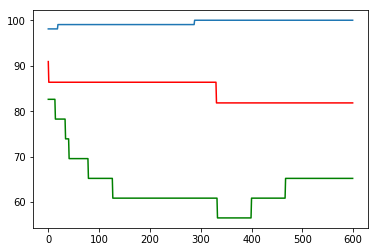

In [162]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/predictions.shape[0])

import copy
    
train_labels2 = copy.deepcopy(train_labels)
valid_labels2 = copy.deepcopy(valid_labels)
test_labels2 = copy.deepcopy(test_labels)

train_labels2 = reformat(train_labels2,3)
valid_labels2 = reformat(valid_labels2,3)
test_labels2 = reformat(test_labels2,3)

results = []
for t in range(3000):
    i = 0
    while i < total_training_samples:
        batch = train[i : i + batch_size]
        batch_labels = train_labels[i : i + batch_size]
        #batch_labels = unOneHot(batch_labels)
        x = Variable(torch.Tensor(batch))
        y = Variable(torch.Tensor(batch_labels), requires_grad = False).type(torch.LongTensor)
        i += batch_size
        y_pred = model(x)
        
        loss = multiLabelLoss(y_pred, y)
        #print(loss, end = '\r')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if not t%5:
        print(t, loss)
        train_pred = model(train_x)
        
        
        tracc = accuracy(train_pred.data.numpy(), train_labels2)
        valid_pred = model(valid_x)
        
        
        
        vacc = accuracy(valid_pred.data.numpy(), valid_labels2)
        #print(valid_pred.data.numpy())
        #raise ValueError
        test_pred = model(test_x)
        
        
        
        tacc = accuracy(test_pred.data.numpy(), test_labels2)
        print(tracc, vacc, tacc)
        results.append((tracc, vacc, tacc))
y_pred = model(x)
print(x, y_pred)
results = np.array(results)
import matplotlib.pyplot as plt
#pickle.dump(results, open("TorchSwitchingAct.pickle", "wb"))
plt.plot(results[:, 0])
plt.plot(results[:, 1], 'r')
plt.plot(results[:, 2], 'g')
plt.show()
